In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

<Figure size 432x288 with 0 Axes>

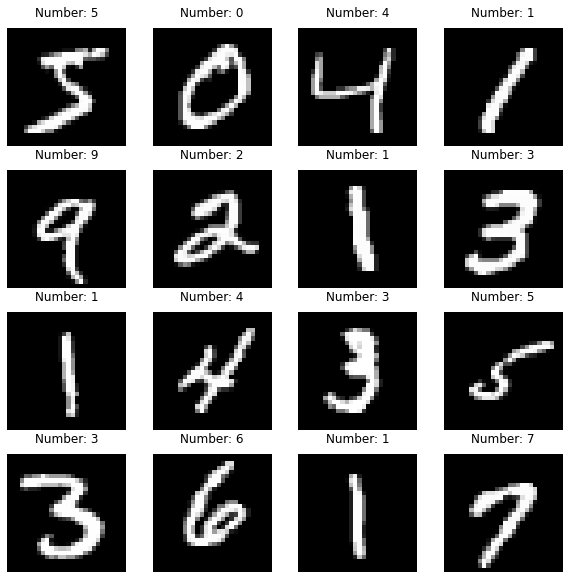

In [ ]:
plt.gray()
fig,axs = plt.subplots(4, 4, figsize=(10,10))
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title(f'Number: {y_train[i]}')
fig.show()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
input_format = (28,28,1)

In [ ]:
x_train /=255
x_test /=255

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_format))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 31s 17ms/step - loss: 0.2069 - accuracy: 0.9375


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0745 - accuracy: 0.9781


[0.07454326003789902, 0.9781000018119812]